In [ ]:
if 'google.colab' in str(get_ipython()):
  # install packages required for this tutorial
  !pip install tensorflow==2.3.1
  !pip install tensorflow_quantum==0.4.0
  !pip install quple==0.7.8

# Tutorial-07 Circuit Descriptors

In this tutorial, you will learn how to use the following circuit descriptors:

- Gradient Variance of a PQC
- Meyer-Wallach measure of a final state
- von Neumann entropy of a PQC
- Entangling measure of a PQC
- Expressibility measure of a PQC

## Circuit Descriptors - Introduction

In designing the suitable data encoding circuit and variational circuit for a QML model, it is important to have some quantitative description about certain properties of the circuit to serve as indicators for the potential performance of a model constructed built upon these circuits.  

In [ ]:
import quple

In [ ]:
# let's create a PQC for testing
from quple.circuits.variational_circuits import RealAmplitudes
# construct an example pqc
n_qubit = 5
# define a parameterised circuit
pqc = RealAmplitudes(n_qubit)
# print out the circuit diagram
pqc

┌──┐       ┌──┐                                   ┌──┐       ┌──┐
(0, 0): ───Ry(θ_0)───@───@───@────@────────────────────Ry(θ_5)───@─────────@───@────@────────────────────Ry(θ_10)──────────────
                     │   │   │    │                              │         │   │    │
(0, 1): ───Ry(θ_1)───X───┼───┼────┼@────@────@─────────Ry(θ_6)───X─────────┼───┼────┼@────@────@─────────Ry(θ_11)──────────────
                         │   │    ││    │    │                             │   │    ││    │    │
(0, 2): ───Ry(θ_2)───────X───┼────┼X────┼────┼@────@───Ry(θ_7)─────────────X───┼────┼X────┼────┼@────@───Ry(θ_12)──────────────
                             │    │     │    ││    │                           │    │     │    ││    │
(0, 3): ───Ry(θ_3)───────────X────┼─────X────┼X────┼───@─────────Ry(θ_8)───────X────┼─────X────┼X────┼───@──────────Ry(θ_13)───
                                  │          │     │   │                            │          │     │   │
(0, 4): ───Ry(θ_4)────────────────X──────────X─────X───X─────────Ry(θ_9)────────────X──────────X─────X───X──────────Ry(θ_14)───
                                 └──┘       └──┘                                   └──┘       └──┘

## Gradient Variance Test

Performs the gradient variance test for a parameter symbol in a parameterised circuit

Reference: https://www.nature.com/articles/s41467-018-07090-4

- Arguments:
 - circuits: list of cirq.Circuit, quple.QuantumCircuit\
 The circuits to perform the gradient variance test
 - op: cirq.Gate\
 The gate operation to sample the expectation value from
 - symbol: str, default=None\
 The parameter symbol which the values are varied in the gradient variance test.\
 If None, the first symbol that appears in the circuit will be varied whereas others are fixed
 by some random value.
            
- Returns:
 - Gradient variance of a parameter symbol among the given circuits

In [ ]:
# Define some measurement of interest
# in this case, product of the Z of first qubit and the Z of second qubit
operator = pqc.gate_operation('Z', pqc.qubits[0])*pqc.gate_operation('Z', pqc.qubits[1])

In [ ]:
# Perform the gradient variance test on the same circuit
quple.gradient_variance_test([pqc]*200, operator)

0.3471605

## Samples the final states of a circuit.

If the circuit has parameterised gate operation, random values of
the symbol values in the range $(0, 2\pi)$ will be assigned to the gate operation.

If `data` is given, the symbol values will be assigned according to the given data.
    
Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [ ]:
final_states = quple.sample_final_states(pqc, samples=200)
final_states

array([[ 0.00597325-2.39220519e-08j,  0.30387282+1.88368773e-07j,
        -0.05977686-4.02324005e-08j, ..., -0.01899222-1.20912276e-08j,
         0.01906516+7.99820654e-09j,  0.17343707+1.11165548e-07j],
       [-0.02782084-4.13327284e-09j, -0.03434315-3.50402161e-08j,
         0.00180173-3.36421593e-08j, ..., -0.13470313-9.78010632e-08j,
         0.13856038+1.19658097e-07j,  0.10997967+1.67116809e-07j],
       [ 0.25837514+2.30124968e-07j,  0.10353897+1.26062304e-07j,
        -0.23144075-1.50121693e-07j, ..., -0.01035353-5.81237281e-08j,
        -0.06436945-1.78614901e-08j,  0.08772714+4.69646793e-08j],
       ...,
       [-0.03766275-1.94938377e-08j,  0.05422747+3.85574737e-08j,
         0.01817641+1.23099575e-08j, ..., -0.5316003 -1.18686344e-07j,
         0.10841008+6.34995274e-08j,  0.09114796+4.72269228e-08j],
       [ 0.37734964+1.85575587e-07j, -0.13618223-3.82212590e-08j,
         0.18723738+1.54216124e-07j, ...,  0.05216685+2.36239188e-08j,
         0.26063773+1.24348588e-07j

## Sample Circuit Qubit Density Matrices


Samples the density matrices of a circuit.

If the circuit has parameterised gate operation, random values of
the symbol values in the range $(0, 2\pi)$ will be assigned to the gate operation.

If `data` is given, the symbol values will be assigned according to the given data.
    
Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [ ]:
density_matrices = quple.sample_density_matrices(pqc, samples=200)
density_matrices

[array([[ 0.07238256+0.00000000e+00j,  0.04453724-3.32318528e-09j,
         -0.01665419+2.11354712e-09j, ...,  0.02873656-2.33256880e-09j,
          0.01713632-1.05035847e-09j,  0.02703687-5.64936675e-09j],
        [ 0.04453724+3.32318528e-09j,  0.02740392+0.00000000e+00j,
         -0.01024738+5.35855360e-10j, ...,  0.01768171-1.15901955e-10j,
          0.01054404+1.40462975e-10j,  0.01663588-2.23477459e-09j],
        [-0.01665419-2.11354712e-09j, -0.01024738-5.35855360e-10j,
          0.00383189+0.00000000e+00j, ..., -0.00661187-3.02407432e-10j,
         -0.00394282-2.58702393e-10j, -0.0062208 +5.10370857e-10j],
        ...,
        [ 0.02873656+2.33256880e-09j,  0.01768171+1.15901955e-10j,
         -0.00661187+3.02407432e-10j, ...,  0.01140869+0.00000000e+00j,
          0.00680328+1.35225386e-10j,  0.01073389-1.37157352e-09j],
        [ 0.01713632+1.05035847e-09j,  0.01054404-1.40462975e-10j,
         -0.00394282+2.58702393e-10j, ...,  0.00680328-1.35225386e-10j,
          0.00405696

## Meyer-Wallach measure of a State

Calculate the Meyer-Wallach measure of a quantum state

Reference: https://arxiv.org/pdf/quant-ph/0305094.pdf

In [ ]:
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_states[0])
Meyer_Wallach_measure

0.6441893815994263

In [ ]:
# evaluate the Meyer Wallach measure of a Bell State
bell_circuit = quple.bell_circuit
final_state = quple.sample_final_states(bell_circuit)[0]
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_state)
Meyer_Wallach_measure

0.9999998807907104

## The von Neumann entropy of a PQC

The average von Neumann entropy of the sampled density matrices of a parameterised quantum circuit.

Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [ ]:
quple.circuit_von_neumann_entropy(pqc, samples=200)

1.980302606839915e-06

# The Entangling measure of PQC
- It is the average Meyer-Wallach measure of all the final states sampled from a parametrized quantum circuit

Reference: https://arxiv.org/pdf/1905.10876.pdf

Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [ ]:
quple.circuit_entangling_measure(pqc, samples=200)

0.60175678994786

## The Expressibility measure of PQC
- It is the Kullback-Leibler divergence between the fidelity pdf of PQC and the Haar fidelity pdf

Reference: https://arxiv.org/pdf/1905.10876.pdf

Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$
* bins (int): Number of bins for the fidelity pdf.

In [ ]:
quple.circuit_expressibility_measure(pqc, samples=3000, bins=100)

0.17382636143716634

##  Plotting the fidelity pdf of PQC and Haar

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/lib/python3.7/site-packages/matplotlib/pyplot.py'>

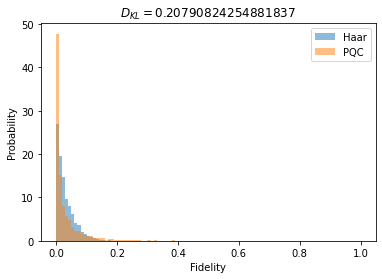

In [ ]:
quple.circuit_fidelity_plot(pqc, samples=3000, bins=100)

## Reproducing results from the paper https://arxiv.org/pdf/1905.10876.pdf on page 5:

* Note that in our case, the Haar distributions are **sampled** but **not analytic**

In [ ]:
import sympy as sp
# circuit A
cq_A = quple.QuantumCircuit(n_qubit=1)
cq_A.H(0)
cq_A.RZ(sp.Symbol('x'),0)
cq_A

(0, 0): ───H───Rz(x)───

In [ ]:
# circuit B
cq_B = quple.QuantumCircuit(n_qubit=1)
cq_B.H(0)
cq_B.RZ(sp.Symbol('x_0'),0)
cq_B.RX(sp.Symbol('x_1'),0)
cq_B

(0, 0): ───H───Rz(x_0)───Rx(x_1)───

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/lib/python3.7/site-packages/matplotlib/pyplot.py'>

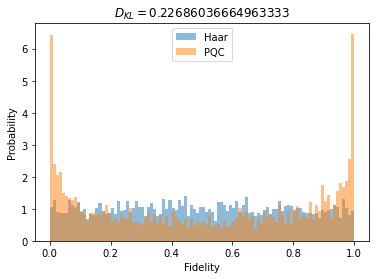

In [ ]:
quple.circuit_fidelity_plot(cq_A, samples=3000, bins=100)

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/lib/python3.7/site-packages/matplotlib/pyplot.py'>

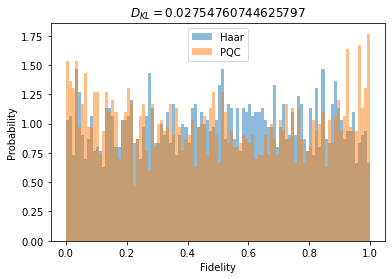

In [ ]:
quple.circuit_fidelity_plot(cq_B, samples=3000, bins=100)